In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
%matplotlib notebook


In [3]:
df = pd.read_csv('datasets/bank/API_FR.INR.LEND_DS2_en_csv_v2.csv')

In [4]:
df = df[df['Country Name'] == 'India']

In [5]:
df = df[df.columns[-30:-2]]

In [6]:
df

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
107,16.5,16.5,17.875,18.916667,16.25,14.75,15.458333,15.958333,13.833333,13.541667,...,13.020833,13.3125,12.1875,8.33335,10.166667,10.604167,10.291667,10.25,10.008333,9.6725


In [7]:
df2 = pd.DataFrame()
df2['Year'] = df.columns
df2['Price'] = df.values.reshape(-1)

In [57]:
df2

,Year,Slope,Price
0,1989,0.000000,16.500000
1,1990,1.375000,16.500000
2,1991,1.041667,17.875000
3,1992,-2.666667,18.916667
4,1993,-1.500000,16.250000
5,1994,0.708333,14.750000
6,1995,0.500000,15.458333
7,1996,-2.125000,15.958333
8,1997,-0.291667,13.833333
9,1998,-1.000000,13.541667


<IPython.core.display.Javascript object>


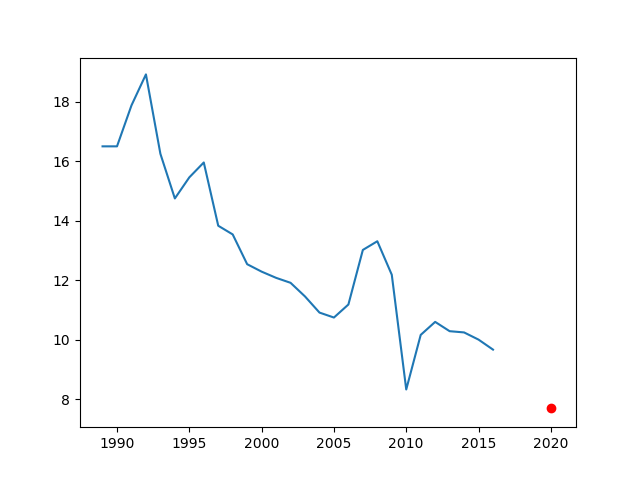

In [58]:
fig = plt.figure(1)
axes = fig.add_subplot(111)
axes.plot(df2['Year'], df2['Price'])
plt.show()

In [59]:
lss = []

for x in range(len(df2['Year']) - 1):
    lss.append(df2['Price'][x+1] - df2['Price'][x])
print(lss)
lss.append(lss[-1])

[0.0, 1.375, 1.0416666666666998, -2.6666666666666998, -1.5, 0.70833333333330195, 0.5, -2.125, -0.2916666666666039, -1.0, -0.25, -0.2083333333333961, -0.1666666666666039, -0.4583333333333961, -0.5416666666666039, -0.16666666666669805, 0.4375, 1.833333333333302, 0.29166666666669805, -1.125, -3.8541500000000006, 1.8333166666667005, 0.4375, -0.3125, -0.041666666666699825, -0.24166666666669911, -0.33583333333330145]


In [60]:
df2['Slope'] = lss

In [61]:
df2

,Year,Slope,Price
0,1989,0.000000,16.500000
1,1990,1.375000,16.500000
2,1991,1.041667,17.875000
3,1992,-2.666667,18.916667
4,1993,-1.500000,16.250000
5,1994,0.708333,14.750000
6,1995,0.500000,15.458333
7,1996,-2.125000,15.958333
8,1997,-0.291667,13.833333
9,1998,-1.000000,13.541667


In [62]:
df2 = df2[['Year', 'Slope', 'Price']]

In [63]:
df2

,Year,Slope,Price
0,1989,0.000000,16.500000
1,1990,1.375000,16.500000
2,1991,1.041667,17.875000
3,1992,-2.666667,18.916667
4,1993,-1.500000,16.250000
5,1994,0.708333,14.750000
6,1995,0.500000,15.458333
7,1996,-2.125000,15.958333
8,1997,-0.291667,13.833333
9,1998,-1.000000,13.541667


In [64]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(df2[df2.columns[0:1]], df2['Price'])

In [65]:
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

linear model coeff (w): [-0.29441154]
linear model intercept (b): 602.437


In [66]:
listt = []
years = []
for x in range(2020,2021):
    years.append(x)
    listt.append(linreg.predict(x))
listt

plt.scatter(years, listt, c='r')

In [67]:
plt.plot?

In [68]:
listt

[array([ 7.72553682])]